In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from wgan import Critic, Generator, WGAN, critic_loss, generator_loss

2023-07-16 22:38:58.007606: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-07-16 22:38:58.008846: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-16 22:38:58.037250: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-07-16 22:38:58.038160: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-16 22:38:58.516578: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

In [2]:
# training params
batch_size = 64
epochs = 1500

# arch params
hidden_dim = 32
latent_dim = 16

# optim params
lambda_ = 10.0
n_critic = 5
alpha = 0.0001
beta_1, beta_2 = 0.0, 0.9

df = pd.read_csv("datasets/multivariate_normal_dim20.csv").astype("float32")
dataset = tf.data.Dataset.from_tensor_slices(df.values).batch(batch_size=batch_size)

critic = Critic(hidden_dim=hidden_dim)
generator = Generator(output_dim=df.shape[1], hidden_dim=hidden_dim)

critic_optimizer = tf.keras.optimizers.Adam(
    learning_rate=alpha, beta_1=beta_1, beta_2=beta_2
)
generator_optimizer = tf.keras.optimizers.Adam(
    learning_rate=alpha, beta_1=beta_1, beta_2=beta_2
)

# Get the Wasserstein GAN model
wgan = WGAN(
    critic=critic,
    generator=generator,
    latent_dim=latent_dim,
    n_critic=n_critic,
    lambda_=lambda_,
)

# Compile the Wasserstein GAN model
wgan.compile(
    critic_optimizer=critic_optimizer,
    generator_optimizer=generator_optimizer,
    critic_loss_fn=critic_loss,
    generator_loss_fn=generator_loss,
)

# Start training
# TODO Load SIRR composition data
# callbacks = [tf.keras.callbacks.EarlyStopping(monitor="critic_loss", patience=100)]

history = wgan.fit(dataset, epochs=epochs)

Epoch 1/1500


2023-07-16 22:38:59.179882: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-07-16 22:38:59.180131: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


8/8 [==============================] - 2s 4ms/step - critic_loss: -0.0699 - generator_loss: 0.4684
Epoch 2/1500
8/8 [==============================] - 0s 3ms/step - critic_loss: -0.0775 - generator_loss: 0.5208
Epoch 3/1500
8/8 [==============================] - 0s 3ms/step - critic_loss: -0.0740 - generator_loss: 0.5771
Epoch 4/1500
8/8 [==============================] - 0s 4ms/step - critic_loss: -0.0850 - generator_loss: 0.6278
Epoch 5/1500
8/8 [==============================] - 0s 3ms/step - critic_loss: -0.0952 - generator_loss: 0.6705
Epoch 6/1500
8/8 [==============================] - 0s 3ms/step - critic_loss: -0.1122 - generator_loss: 0.7095
Epoch 7/1500
8/8 [==============================] - 0s 3ms/step - critic_loss: -0.1187 - generator_loss: 0.7572
Epoch 8/1500
8/8 [==============================] - 0s 3ms/step - critic_loss: -0.1270 - generator_loss: 0.8080
Epoch 9/1500
8/8 [==============================] - 0s 3ms/step - critic_loss: -0.1363 - generator_loss: 0.8395
Epoch

Critic Model params: 705
Generator Model params: 1204


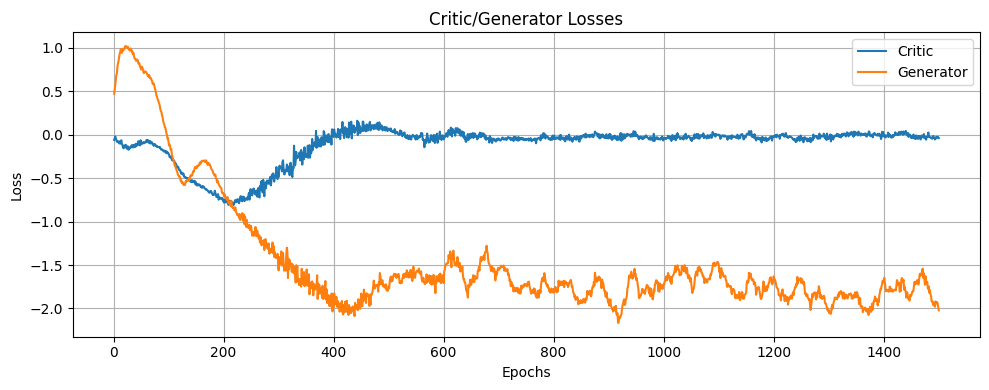

In [3]:
print("Critic Model params: {}".format(critic.count_params()))
print("Generator Model params: {}".format(generator.count_params()))

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(
    np.arange(1, len(history.history["critic_loss"]) + 1),
    history.history["critic_loss"],
    label="Critic",
)
ax.plot(
    np.arange(1, len(history.history["generator_loss"]) + 1),
    history.history["generator_loss"],
    label="Generator",
)
ax.set_title("Critic/Generator Losses")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.grid(True)
ax.legend()

fig.tight_layout()
# fig.savefig("train_history.png", dpi=600)
plt.show()

In [4]:
for feat in dataset.take(1):
    print(wgan.critic(feat))

tf.Tensor(
[[1.9300101]
 [1.8513305]
 [1.9395857]
 [2.0087237]
 [1.8302681]
 [2.0420096]
 [2.0512598]
 [1.9457526]
 [2.131109 ]
 [1.9111651]
 [1.7801336]
 [1.9536526]
 [2.1266708]
 [1.9368459]
 [2.11043  ]
 [1.8383129]
 [1.9913033]
 [1.859134 ]
 [2.1314845]
 [2.0377998]
 [2.0202138]
 [1.9004365]
 [2.0530672]
 [1.9018259]
 [1.9369466]
 [1.8392564]
 [2.0287771]
 [2.122646 ]
 [1.856786 ]
 [1.8979957]
 [2.0702453]
 [2.1615343]
 [2.106174 ]
 [2.0680883]
 [1.9730959]
 [2.1040213]
 [2.068572 ]
 [2.0133247]
 [2.0350127]
 [1.9623168]
 [2.0590591]
 [2.1430051]
 [1.9612849]
 [2.0233314]
 [1.920558 ]
 [2.0734198]
 [2.1304898]
 [1.9372983]
 [1.9105569]
 [2.1616118]
 [2.0450153]
 [2.095224 ]
 [2.0638611]
 [2.1263916]
 [1.9361861]
 [2.0552049]
 [2.0260534]
 [1.9362385]
 [2.0659976]
 [2.1654086]
 [2.1335526]
 [1.8807892]
 [1.9093177]
 [2.036397 ]], shape=(64, 1), dtype=float32)


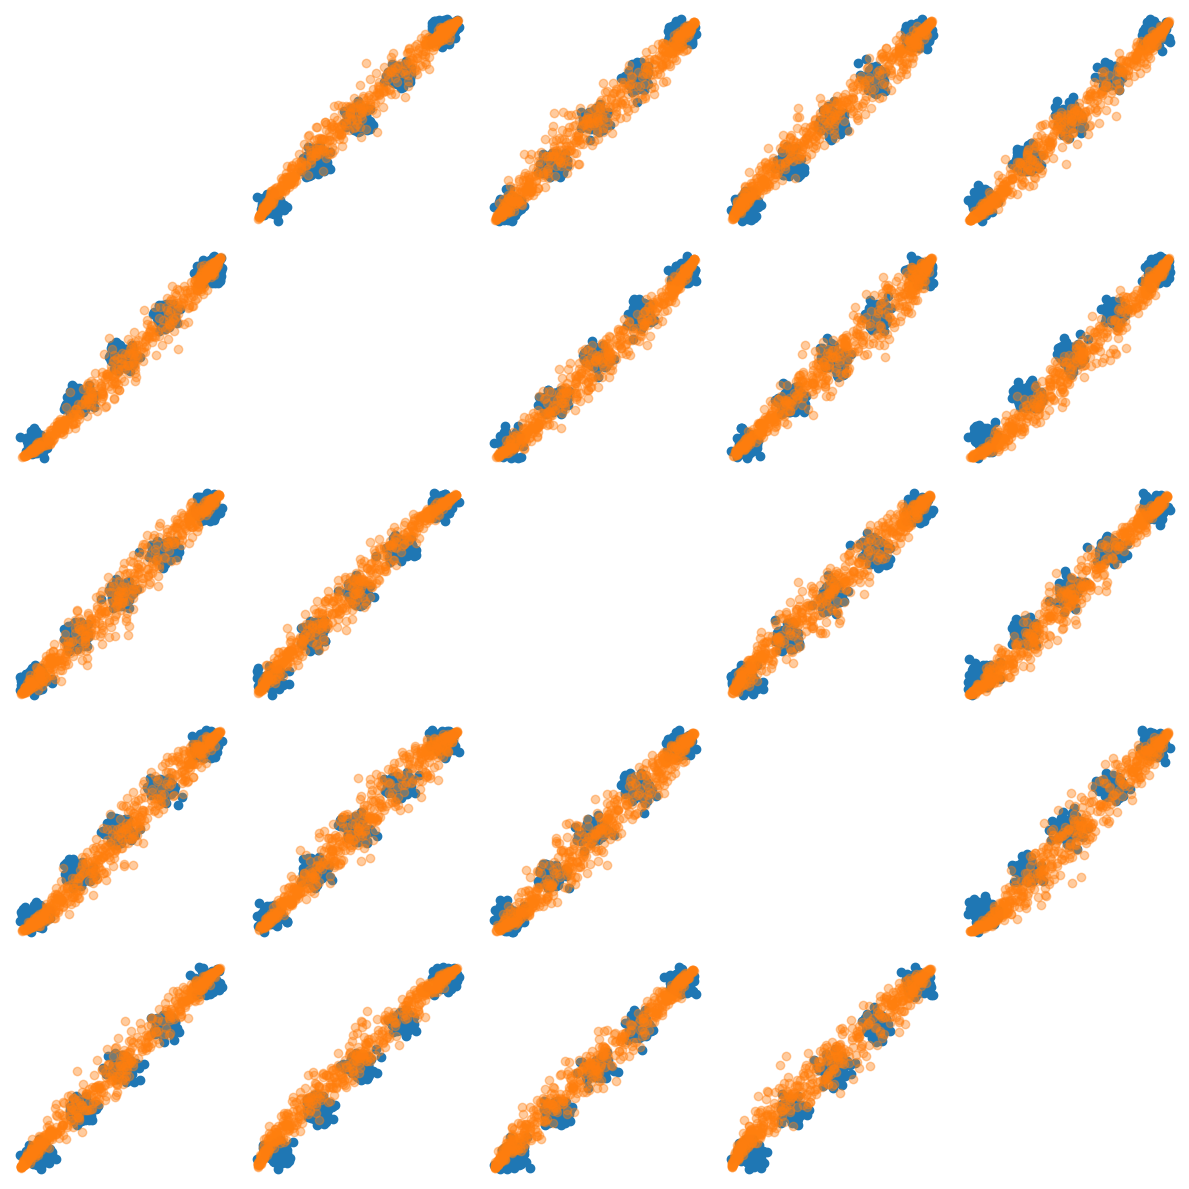

In [13]:
# Generate data
random_latent_vectors = tf.random.normal((500, latent_dim))
syntetic_data = wgan.generator(random_latent_vectors)

fig, axs = plt.subplots(5, 5, figsize=(12, 12))

for row in range(0, 5):
    for col in range(0, 5):
        axs[row, col].axis("off")
        if not (row == col):
            axs[row, col].scatter(df.iloc[:, row], df.iloc[:, col])
            axs[row, col].scatter(
                syntetic_data[:, row], syntetic_data[:, col], alpha=0.4
            )


fig.tight_layout()